In [2]:
:set -XRebindableSyntax
:set -XNoImplicitPrelude

import Privacy.Prelude

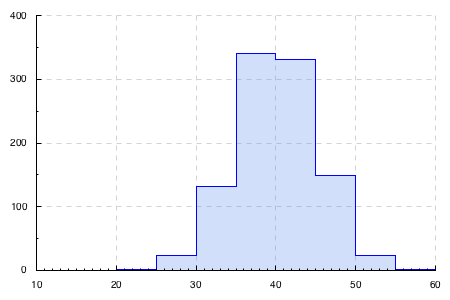

In [9]:
import Control.Monad.Random.State
import System.Random
import Statistics.Distribution.Normal
import System.Random.MWC
import Statistics.Distribution
import Graphics.Rendering.Chart.Plot.Histogram.Simple

randVar :: IO Int
randVar = fromEnum <$>
    withSystemRandom (genContVar (normalDistr 40 5) `asTypeOf`
                      const (undefined :: IO Double))
                      
randomVars <- replicateM 1000 randVar


:opt svg

contHist 5 10 (map toEnum randomVars)

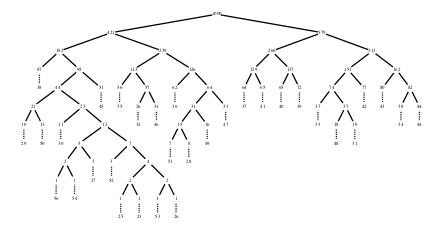

In [15]:
import Algebra.Information.Huffman
import qualified Data.List.NonEmpty as NonEmpty
import Data.Functor.Contravariant

tree = huffmanTree defaultComparison (const (Sum 1)) (NonEmpty.fromList randomVars)

import Data.Bifunctor

first getSum tree

In [19]:
import Algebra.Information.Tree

zipLongest :: (a -> a -> a) -> [a] -> [a] -> [a]
zipLongest f [] ys = ys
zipLongest f xs [] = xs
zipLongest f (x:xs) (y:ys) = f x y : zipLongest f xs ys

rates :: Ord a => Tree a b -> [a]
rates (Leaf x _) = [x]
rates (Node x l r) = x : zipLongest min (rates l) (rates r)

map getSum (rates tree)

[1000,421,182,87,44,21,10,5,2,1,1]

In [34]:
rateDistortion
    = rates
    . first getSum
    . huffmanTree defaultComparison (const (Sum 1))
    . NonEmpty.fromList

In [ ]:
import Graphics.Rendering.Chart.Plot.Lines
import Graphics.Rendering.Chart.Plot
import Graphics.Rendering.Chart.Layout
import Graphics.Rendering.Chart (toRenderable)
import Control.Lens ((.~))
import Data.Default


plotRateDistortion xs = toRenderable $ layout_plots .~ [toPlot $ PlotLines "rate/dist" defaultPlotLineStyle [zip xs [0..]] []] $ def

plotRateDistortion . rateDistortion <$> replicateM 100000 randVar